In [12]:
from warnings import filterwarnings
filterwarnings('ignore')

In [13]:
import pandas as pd
df=pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### X and Y selection

In [15]:
X=df.drop(labels=["PROFIT"],axis=1)
Y=df[["PROFIT"]]
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


### cat con Sep


In [17]:
from PM11 import catcon_sep
cat,con=catcon_sep(X)

In [18]:
cat,con

(['STATE'], ['RND', 'ADMIN', 'MKT'])

### Pipeline

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='mean'))])

cat_pipe=Pipeline(steps=[("impute",SimpleImputer(strategy="most_frequent")),
                          ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre=ColumnTransformer([('num',num_pipe,con),
                       ('cat',cat_pipe,cat)])

In [21]:
X_pre=pre.fit_transform(X)
X_pre

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.2333488e+05, 1.0867917e+05,

In [22]:
cols=pre.get_feature_names_out()
cols

array(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'], dtype=object)

In [24]:
X_pre=pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,165349.20,136897.80,471784.10,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0


### train test split

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=21)
xtrain.shape,xtest.shape

((40, 6), (10, 6))

### Build the final model

In [26]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [28]:
model.score(xtrain,ytrain)

1.0

In [29]:
model.score(xtest,ytest)

0.9332715271565518

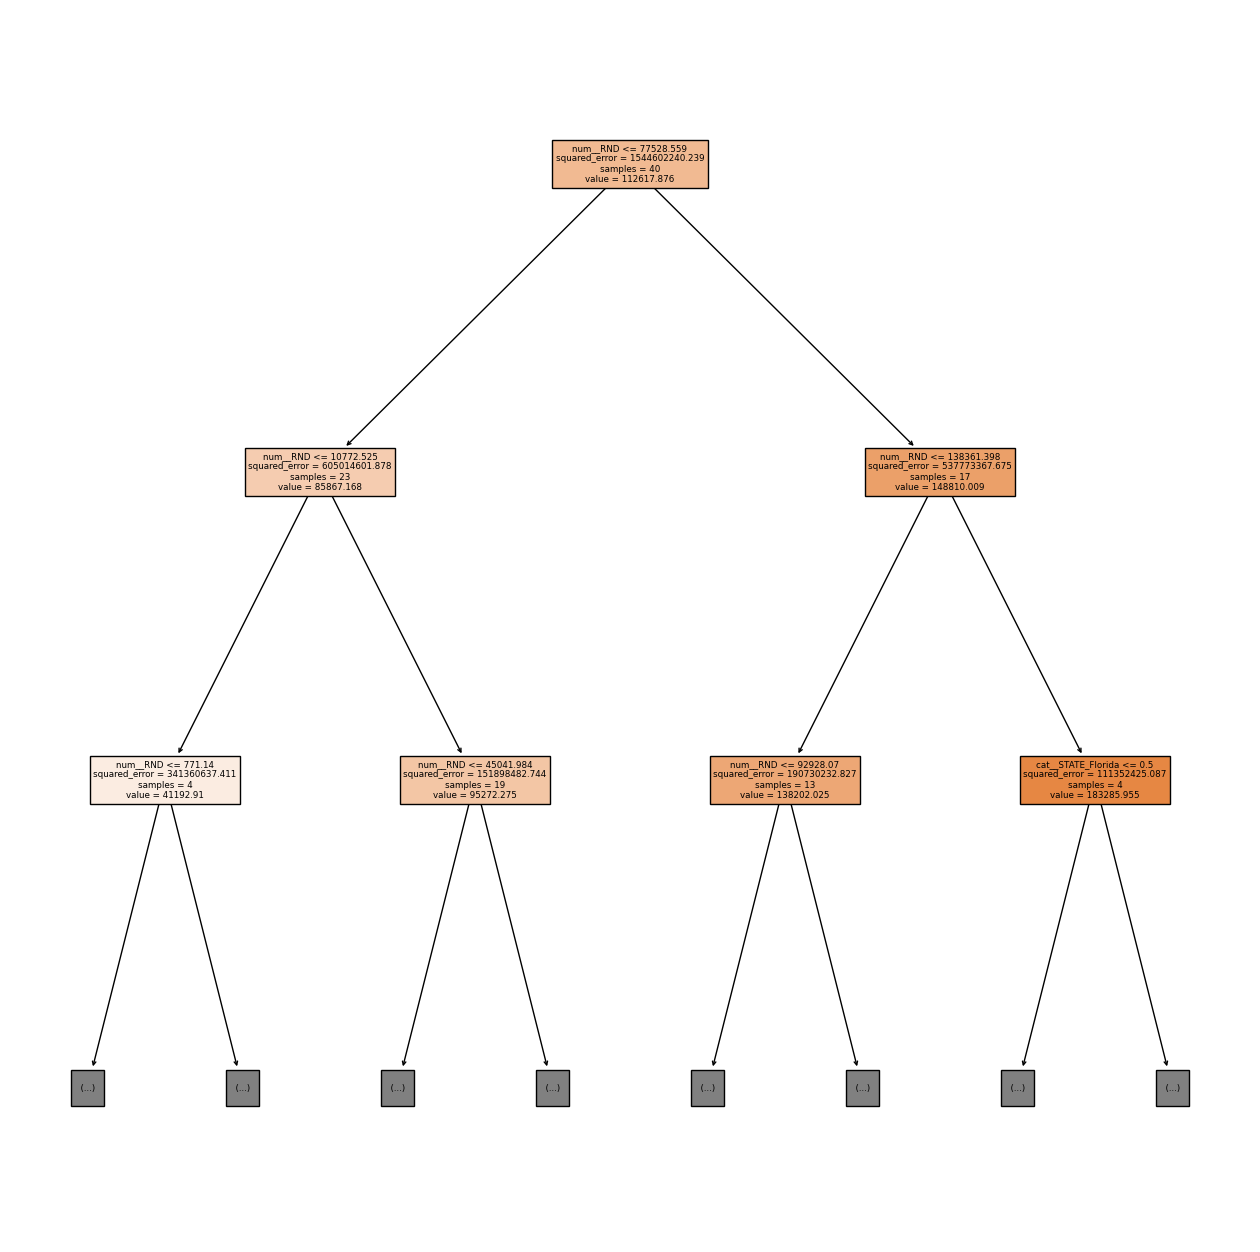

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plot_tree(model,feature_names=xtrain.columns,filled=True,max_depth=2)
plt.show()

### model Evaluation

In [32]:
from PM11 import evaluate_model
evaluate_model(xtrain,ytrain,xtest,ytest,model)

Training Results:
MSE  : 0.00
RMSE : 0.00
MAE  : 0.00
R2   : 1.0000


Testing Results:
MSE  : 118426148.26
RMSE : 10882.38
MAE  : 7621.92
R2   : 0.9333


### Hyperparameter tuning

In [36]:
params={'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
        'min_samples_split':[6,7,8,9,10,11,12,13,14,15],
        'criterion':['squared_error','absolute_error']}
params

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 'min_samples_split': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 'criterion': ['squared_error', 'absolute_error']}

In [37]:
from sklearn.model_selection import GridSearchCV
model1=DecisionTreeRegressor()
gscv=GridSearchCV(model1,param_grid=params,cv=5,scoring="neg_mean_squared_error")
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16],
                         'min_samples_split': [6, 7, 8, 9, 10, 11, 12, 13, 14,
                                               15]},
             scoring='neg_mean_squared_error')

In [38]:
gscv.best_params_

{'criterion': 'absolute_error', 'max_depth': 16, 'min_samples_split': 6}

In [41]:
best_model=gscv.best_estimator_
best_model

DecisionTreeRegressor(criterion='absolute_error', max_depth=16,
                      min_samples_split=6)

In [42]:
best_model.score(xtrain,ytrain)

0.9657170478095985

In [43]:
best_model.score(xtest,ytest)

0.939209511001833

In [44]:
evaluate_model(xtrain,ytrain,xtest,ytest,best_model)

Training Results:
MSE  : 52953524.76
RMSE : 7276.92
MAE  : 4298.18
R2   : 0.9657


Testing Results:
MSE  : 107887730.03
RMSE : 10386.90
MAE  : 6921.58
R2   : 0.9392


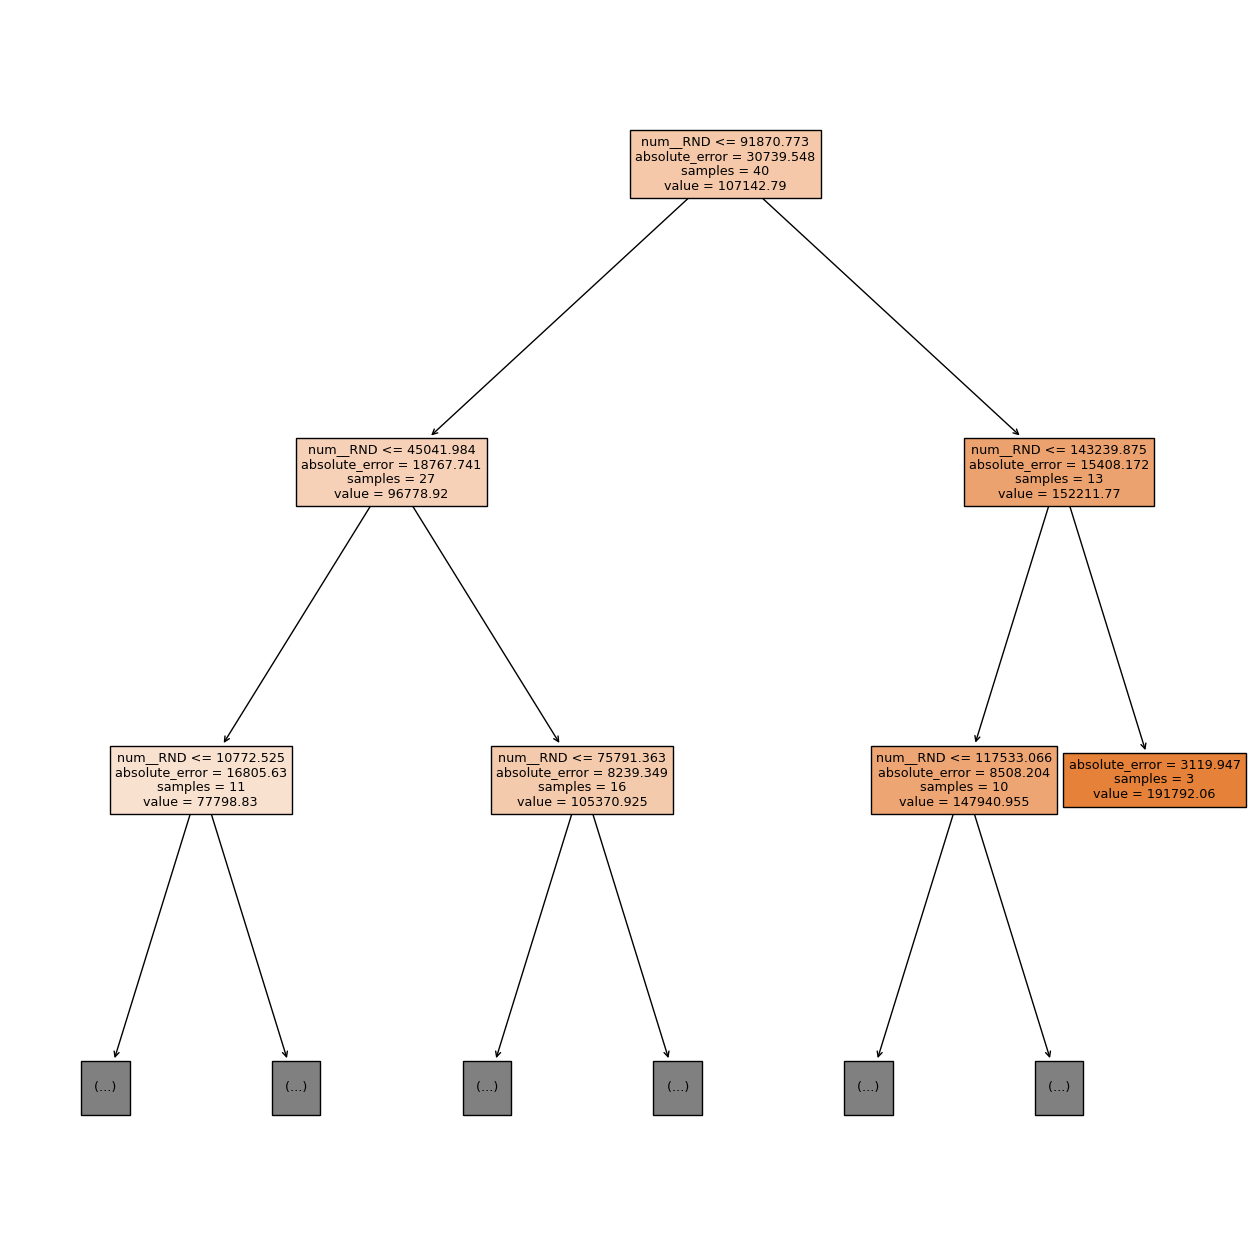

In [45]:
plt.figure(figsize=(16,16))
plot_tree(best_model,feature_names=xtrain.columns,filled=True,max_depth=2)
plt.show()

In [47]:
ypred_tr1=best_model.predict(xtrain)
ypred_ts1=best_model.predict(xtest)

In [51]:
ypred_tr1[0:5]

array([ 96778.92, 122776.86, 122776.86, 141585.52, 105008.31])

In [52]:
ytrain.head()

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


### Feature importance

In [53]:
imp=best_model.feature_importances_
imp

array([0.9670238, 0.0134494, 0.0195268, 0.       , 0.       , 0.       ])

In [54]:
imp=pd.Series(imp)
imp.index=xtrain.columns
imp

num__RND                 0.967024
num__ADMIN               0.013449
num__MKT                 0.019527
cat__STATE_California    0.000000
cat__STATE_Florida       0.000000
cat__STATE_New York      0.000000
dtype: float64

In [55]:
imp=imp.sort_values(ascending=False)
imp

num__RND                 0.967024
num__MKT                 0.019527
num__ADMIN               0.013449
cat__STATE_California    0.000000
cat__STATE_Florida       0.000000
cat__STATE_New York      0.000000
dtype: float64

<Axes: title={'center': 'feature importance plot'}>

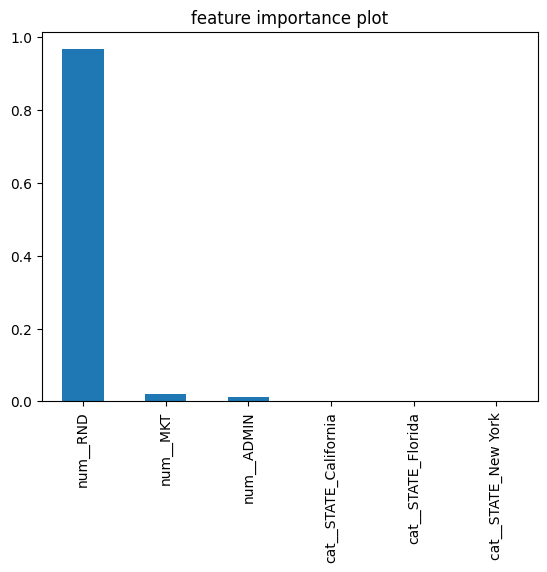

In [56]:
imp.plot(kind='bar',title="feature importance plot")